In [6]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

from demo.lib import DB
from demo import SeedZoneObserver, CoordGenerator
from IPython.display import clear_output

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Demo2. 우체통 지도

## Observe SeedZone Database

In [7]:
SeedZoneObserver.observe()

285

## SeedZone Run

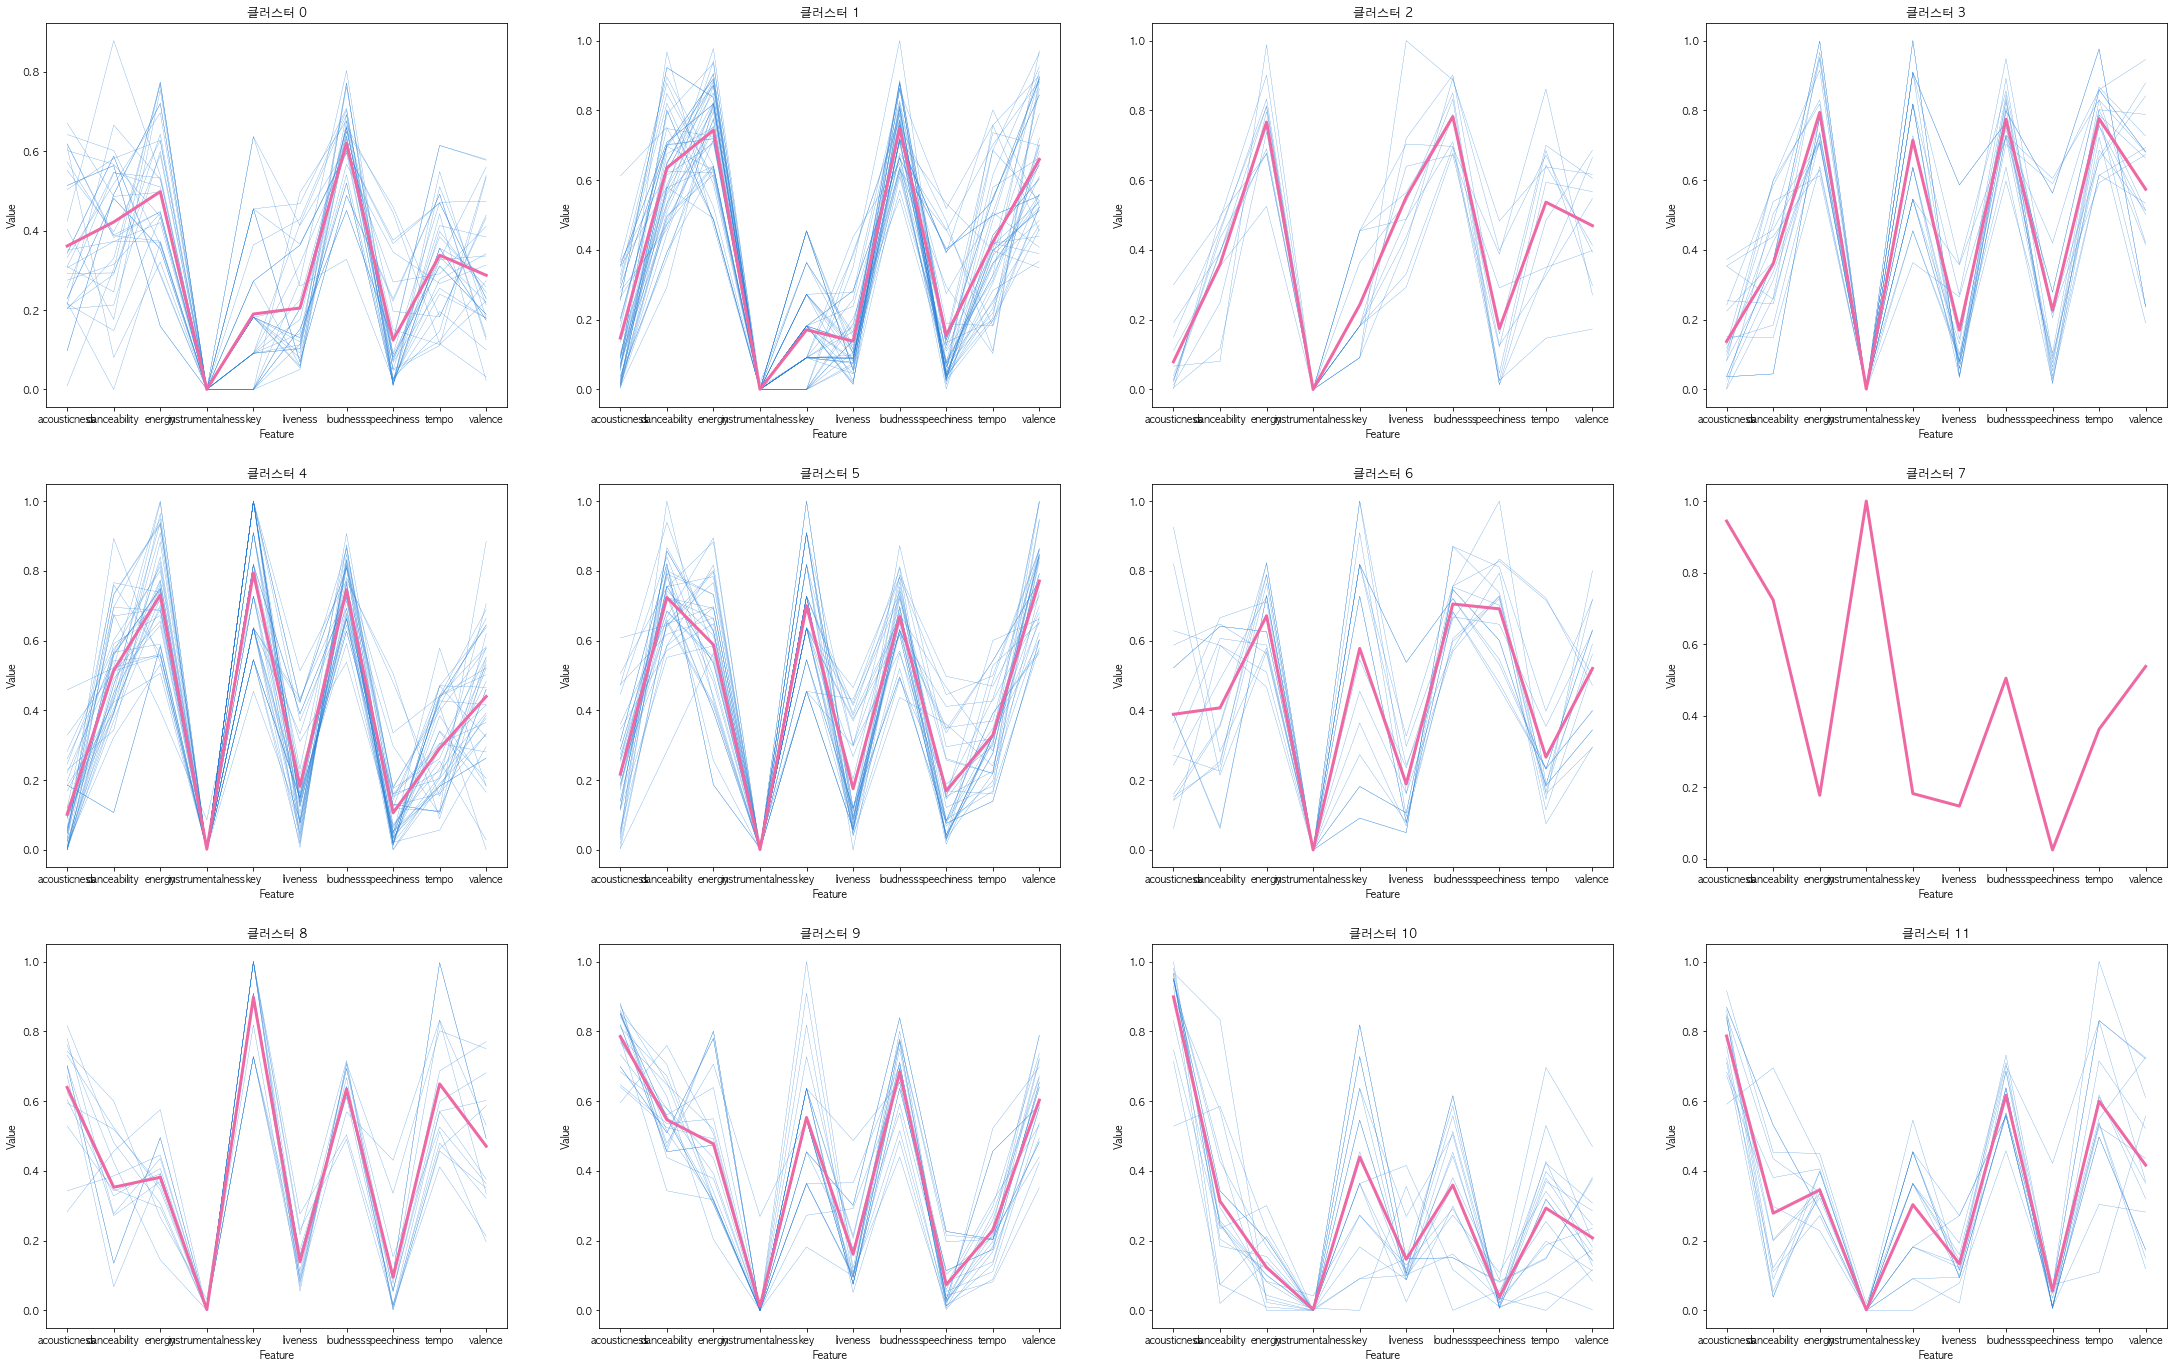

In [8]:
observer = SeedZoneObserver()
observer.run()

clear_output(wait=True)
observer.kmeans.draw_cluster()

## CoordGenerator

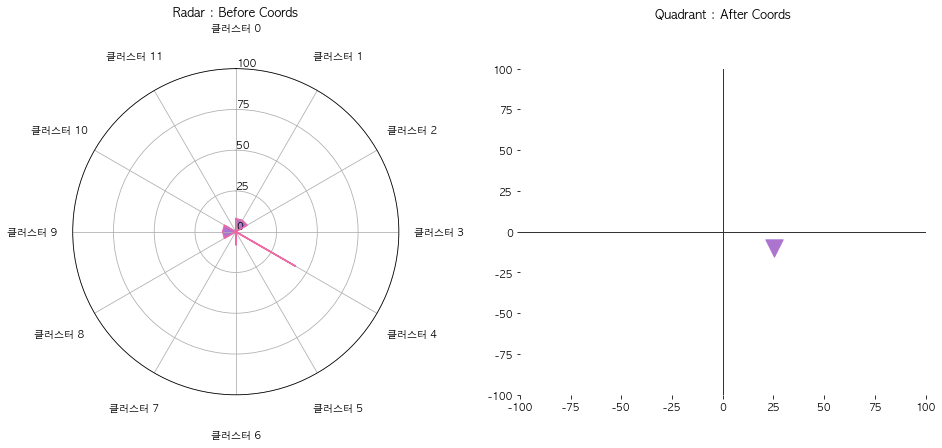

In [88]:
gen = CoordGenerator("62908d70c1caa51c93e508d3")

gen.make_coords()
gen.draw_coord()